In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## What is simple linear regression ?

Simple Linear Regression is a statistical method used to model the relationship between two continuous variables: one independent variable (also called the predictor or feature) and one dependent variable (also called the response or target). It assumes that the relationship between these two variables can be represented by a linear equation, which is a straight line in a two-dimensional space.

In simple linear regression, the goal is to find the best-fitting linear equation that minimizes the difference between the observed values of the dependent variable and the values predicted by the model.

The equation for a simple linear regression line can be written as:
𝑦=𝛽0+𝛽1⋅𝑥+𝜀

Where:

- \( y \) represents the dependent variable (response).
- \( x \) represents the independent variable (predictor).
- \( 𝛽0 ) is the intercept term, representing the value of \( y \) when \( x \) is 0.
- \( 𝛽1 ) is the slope coefficient, representing the change in \( y \) for a unit change in \( x \).
- \( ε ) represents the error term, accounting for the variability that cannot be explained by the model.

#### Now Loading dataset

In [2]:
df = pd.read_csv("Salary_dataset.csv")

#### Displaying the DataFrame

In [3]:
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In the provided dataframe, it is apparent that the column labeled '__unnamed:0__' serves no meaningful purpose and, furthermore, appears to function akin to an index column. Thus, removing this column would be both logical and beneficial.

In [4]:
df.columns

Index(['Unnamed: 0', 'YearsExperience', 'Salary'], dtype='object')

#### Dropping the column 

In [5]:
df.drop('Unnamed: 0', axis=1, inplace = True)

In [6]:
df.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


#### Checking any null values in the datatframe

In [7]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

#### Getting the statistics of dataframe

In [8]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


### Now


**Visualizing the input variable:**
- Input variable: Years of experience

**Visualizing the output variable:**
- Output variable: Salary


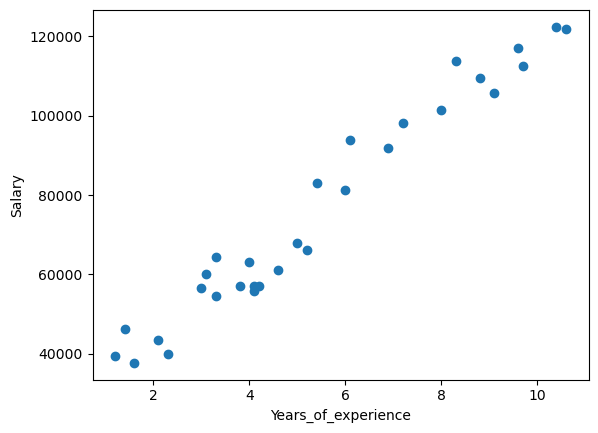

In [9]:
plt.scatter(df['YearsExperience'], df['Salary'])
plt.xlabel("Years_of_experience")
plt.ylabel("Salary")
plt.show()

In [10]:
x = df.iloc[:,0:1].values
y = df.iloc[:,-1].values

In [11]:
x

array([[ 1.2],
       [ 1.4],
       [ 1.6],
       [ 2.1],
       [ 2.3],
       [ 3. ],
       [ 3.1],
       [ 3.3],
       [ 3.3],
       [ 3.8],
       [ 4. ],
       [ 4.1],
       [ 4.1],
       [ 4.2],
       [ 4.6],
       [ 5. ],
       [ 5.2],
       [ 5.4],
       [ 6. ],
       [ 6.1],
       [ 6.9],
       [ 7.2],
       [ 8. ],
       [ 8.3],
       [ 8.8],
       [ 9.1],
       [ 9.6],
       [ 9.7],
       [10.4],
       [10.6]])

In [12]:
y

array([ 39344.,  46206.,  37732.,  43526.,  39892.,  56643.,  60151.,
        54446.,  64446.,  57190.,  63219.,  55795.,  56958.,  57082.,
        61112.,  67939.,  66030.,  83089.,  81364.,  93941.,  91739.,
        98274., 101303., 113813., 109432., 105583., 116970., 112636.,
       122392., 121873.])

#### Obtaining the dimensions of the x and y variables.

In [13]:
print(x.shape)
print(y.shape)

(30, 1)
(30,)


#### Splitting the datatset. 

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=43)

In [15]:
x_train

array([[10.6],
       [ 3. ],
       [ 8.8],
       [ 9.6],
       [ 8.3],
       [ 8. ],
       [ 5. ],
       [ 1.4],
       [ 4.1],
       [ 6. ],
       [ 2.1],
       [10.4],
       [ 4.6],
       [ 1.6],
       [ 9.7],
       [ 6.1],
       [ 5.2],
       [ 7.2],
       [ 5.4],
       [ 1.2],
       [ 2.3]])

#### Training.

In [16]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

#### Predicting the data 

In [17]:
lr.predict(x_test)

array([111561.40695899,  63796.61645269,  64751.91226282,  54243.65835143,
        56154.24997168,  56154.24997168,  62841.32064257,  90544.89913622,
        60930.72902231])

In [18]:
y_pred = lr.predict(x_test)

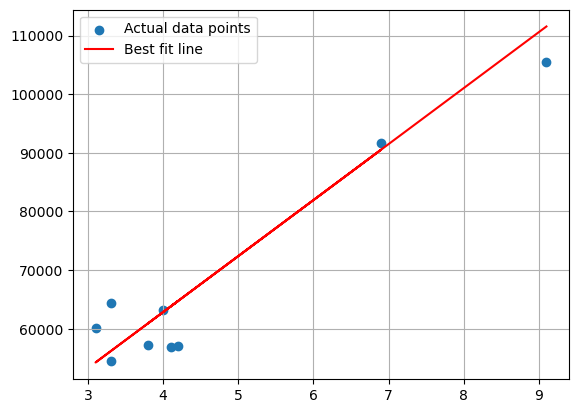

In [19]:
plt.scatter(x_test, y_test, label = "Actual data points")
plt.plot(x_test, y_pred, color = "red", label = "Best fit line")
plt.legend()
plt.grid("True")
plt.show()

#### Checking the accuracy

In [20]:
from sklearn import metrics

In [21]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 4634.087396288687
Mean Squared Error: 29273896.990302585
Root Mean Squared Error: 5410.535739675192
R2 Score: 0.899235317431343


#### Getting the slope and intercept of best fit line.

In [22]:
print("Slope:", lr.coef_[0])
print("Intercept:",lr.intercept_)

Slope: 9552.958101260216
Intercept: 24629.488237524667


#### Plotting the actual data points and predicted data points.


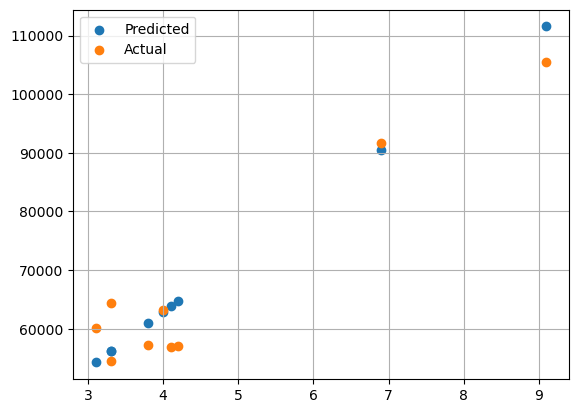

In [23]:
plt.scatter(x_test, y_pred)
plt.scatter(x_test, y_test)
plt.legend(['Predicted', 'Actual'])
plt.grid()
plt.show()

#### Visualizing within the dataframe and comparing the actual data points with the predicted values.

In [24]:
pd.DataFrame({'Actual':y_test.flatten(), 'Predicted':y_pred.flatten()})

,Actual,Predicted
0,105583.0,111561.406959
1,56958.0,63796.616453
2,57082.0,64751.912263
3,60151.0,54243.658351
4,54446.0,56154.249972
5,64446.0,56154.249972
6,63219.0,62841.320643
7,91739.0,90544.899136
8,57190.0,60930.729022
